In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [19]:
X=df.iloc[:,[3,4]]
X

Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


# Apply DBSCAN ALGO

In [12]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=4)
model=dbscan.fit(X)
labels=model.labels_
# in labels -1 represents that there will be clusters

In [11]:
from sklearn import metrics
sample_cores=np.zeros_like(labels,dtype=bool)
sample_cores[dbscan.core_sample_indices_]=True

In [14]:
n_clusters=len(set(labels))-(1 if -1 in labels else 0)

In [15]:
print(metrics.silhouette_score(X,labels))

-0.1908319132560097


# K means Clustering

In [20]:
X.head()

Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

In [21]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
pred=kmeans.fit_predict(X)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [22]:
len(pred)

200

In [24]:
X['cluster']=pred

<ipython-input-24-389cdd829c5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster']=pred


Text(0, 0.5, 'Spending Score')

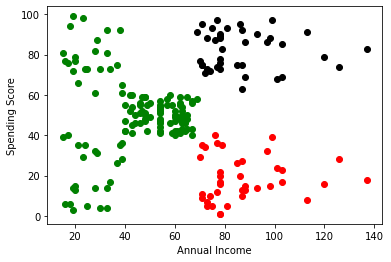

In [30]:
df1 = X[X.cluster==0]
df2 = X[X.cluster==1]
df3 = X[X.cluster==2]

plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color="green")
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color="red")
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color="black")

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

In [31]:
k_rng = range(1,10)
sse=[]
for k in k_rng :
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

In [32]:
sse

[270108.0000000001,
 183684.10855263157,
 106348.37306211119,
 73679.78903948837,
 44451.344336822585,
 37268.75409373235,
 31280.903845940906,
 25018.07986058316,
 22127.3353141045]

Text(0, 0.5, 'Sum Of Squared Error')

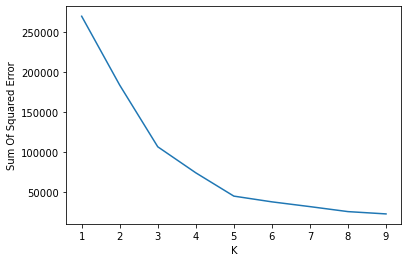

In [34]:
plt.plot(k_rng,sse)
plt.xlabel("K")
plt.ylabel("Sum Of Squared Error")